In [14]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from statsmodels.formula.api import ols

In [3]:
%matplotlib notebook

In [4]:
data = pd.read_stata("http://wps.aw.com/wps/media/objects/11422/11696965/empirical/empex_tb/CollegeDistance.dta")

In [5]:
describe(data)

NameError: name 'describe' is not defined

In [6]:
data.head()

,female,black,hispanic,bytest,dadcoll,momcoll,ownhome,urban,cue80,stwmfg80,dist,tuition,incomehi,ed
0,0.0,0.0,0.0,39.150002,1.0,0.0,1.0,1.0,6.2,8.09,0.2,0.88915,1.0,12.0
1,1.0,0.0,0.0,48.869999,0.0,0.0,1.0,1.0,6.2,8.09,0.2,0.88915,0.0,12.0
2,0.0,0.0,0.0,48.740002,0.0,0.0,1.0,1.0,6.2,8.09,0.2,0.88915,0.0,12.0
3,0.0,1.0,0.0,40.400002,0.0,0.0,1.0,1.0,6.2,8.09,0.2,0.88915,0.0,12.0
4,1.0,0.0,0.0,40.480000,0.0,0.0,0.0,1.0,5.6,8.09,0.4,0.88915,0.0,13.0


In [8]:
data.shape    




(3796, 14)

In [9]:
data.columns

Index([u'female', u'black', u'hispanic', u'bytest', u'dadcoll', u'momcoll',
       u'ownhome', u'urban', u'cue80', u'stwmfg80', u'dist', u'tuition',
       u'incomehi', u'ed'],
      dtype='object')

In [18]:
var_names = set(data.columns)

In [19]:
var_names

{'black',
 'bytest',
 'cue80',
 'dadcoll',
 'dist',
 'ed',
 'female',
 'hispanic',
 'incomehi',
 'momcoll',
 'ownhome',
 'stwmfg80',
 'tuition',
 'urban'}

In [44]:
y_name = set(["ed"])

In [45]:
y_name

{'ed'}

In [46]:
x_names = var_names-y_name

In [47]:
x_names 

{'black',
 'bytest',
 'cue80',
 'dadcoll',
 'dist',
 'female',
 'hispanic',
 'incomehi',
 'momcoll',
 'ownhome',
 'stwmfg80',
 'tuition',
 'urban'}

In [48]:
data.ndim

2

<IPython.core.display.Javascript object>


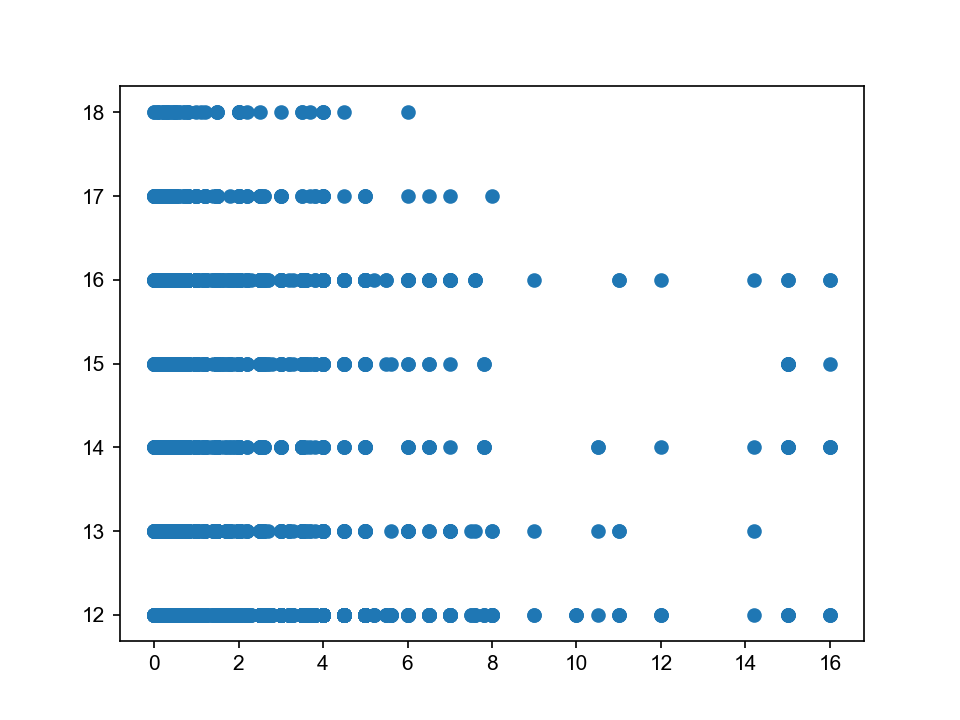

In [49]:
plt.scatter(data.dist,data.ed)

In [73]:
import seaborn

<IPython.core.display.Javascript object>


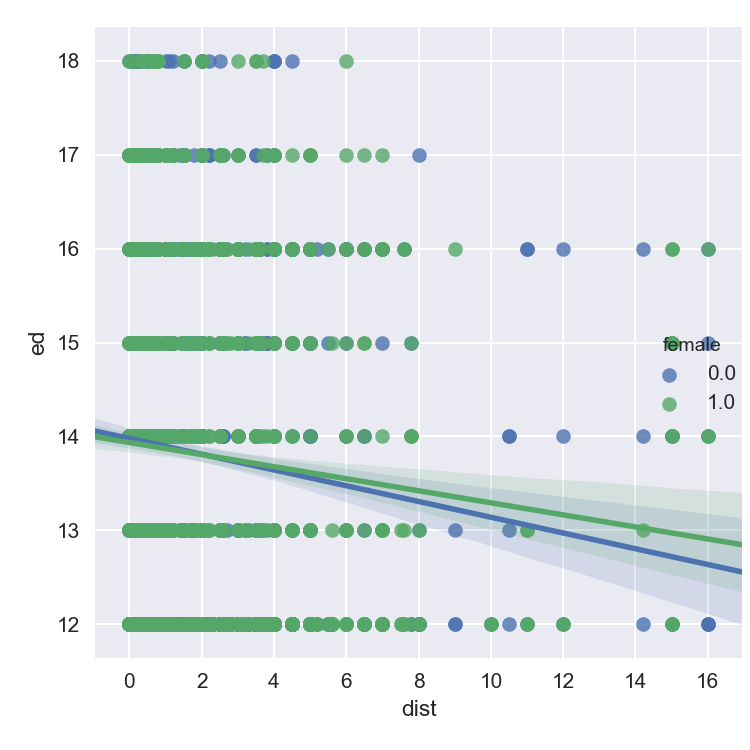

In [75]:
seaborn.lmplot(y='ed', x='dist', hue='female',data=data)  

In [50]:
model1 = ols("ed ~ dist", data).fit()

In [51]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                     ed   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     28.48
Date:                Sun, 04 Jun 2017   Prob (F-statistic):           1.00e-07
Time:                        23:21:01   Log-Likelihood:                -7632.2
No. Observations:                3796   AIC:                         1.527e+04
Df Residuals:                    3794   BIC:                         1.528e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     13.9559      0.038    369.945      0.0

In [53]:

str1 = '+'.join(x_names)

In [54]:
str1

'urban+dist+dadcoll+bytest+tuition+incomehi+hispanic+stwmfg80+female+black+ownhome+cue80+momcoll'

In [55]:
model2 = ols("ed ~"+ str1, data).fit()

In [56]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     ed   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     115.3
Date:                Sun, 04 Jun 2017   Prob (F-statistic):          2.61e-262
Time:                        23:21:15   Log-Likelihood:                -7012.8
No. Observations:                3796   AIC:                         1.405e+04
Df Residuals:                    3782   BIC:                         1.414e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.8935      0.253     35.153      0.0

In [66]:
",".join(x_names)

'urban,dist,dadcoll,bytest,tuition,incomehi,hispanic,stwmfg80,female,black,ownhome,cue80,momcoll'

In [67]:
X = data[list(x_names)]

In [68]:
X.head()

,urban,dist,dadcoll,bytest,tuition,incomehi,hispanic,stwmfg80,female,black,ownhome,cue80,momcoll
0,1.0,0.2,1.0,39.150002,0.88915,1.0,0.0,8.09,0.0,0.0,1.0,6.2,0.0
1,1.0,0.2,0.0,48.869999,0.88915,0.0,0.0,8.09,1.0,0.0,1.0,6.2,0.0
2,1.0,0.2,0.0,48.740002,0.88915,0.0,0.0,8.09,0.0,0.0,1.0,6.2,0.0
3,1.0,0.2,0.0,40.400002,0.88915,0.0,0.0,8.09,0.0,1.0,1.0,6.2,0.0
4,1.0,0.4,0.0,40.480000,0.88915,0.0,0.0,8.09,1.0,0.0,0.0,5.6,0.0


In [69]:
y = data["ed"]

In [71]:



# Note the difference in argument order
model = sm.OLS(y, X).fit()
#predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ed   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.782e+04
Date:                Sun, 04 Jun 2017   Prob (F-statistic):               0.00
Time:                        23:22:32   Log-Likelihood:                -7549.4
No. Observations:                3796   AIC:                         1.512e+04
Df Residuals:                    3783   BIC:                         1.521e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
urban          0.3009      0.073      4.128      0.000         0.158     0.444
dist           0.0562      0.015      3.731      0.000         0.027     0.086
dadcoll        0.4872      0.085      5.738      0.000         0.321     0.654
bytest         0.1604      0.003     54.853      0.000         0.155     0.166
tuition        0.2777      0.115      2.406      0.016         0.051     0.504
incomehi       0.3451      0.070      4.933      0.000         0.208     0.482
hispanic       1.0194      0.087     11.665      0.000         0.848     1.191
stwmfg80       0.3802      0.019     20.330      0.000         0.344     0.417
female         0.4525      0.057      7.909      0.000         0.340     0.565
black          1.3048      0.077     16.963      0.000         1.154     1.456
ownhome        0.5369      0.076      7.070      0.000         0.388     0.686
cue80          0.0225      0.011      1.979      0.048         0.000     0.045
momcoll        0.3025      0.094      3.223      0.001         0.118     0.487
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.203
Skew:                           0.094   Prob(JB):                       0.0450
Kurtosis:                       3.063   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
from sklearn import linear_model

In [77]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [78]:
lm.coef_

array([ 0.06516664, -0.0325859 ,  0.57401472,  0.09306931, -0.18483438,
        0.37411487,  0.34917659, -0.04263267,  0.14392185,  0.33836699,
        0.14325726,  0.02825969,  0.37866986])

In [79]:
lm.score(X,y)

0.28381232323461714

In [80]:
lm.intercept_

8.8935330147024523

In [1]:
library(haven)
library(dplyr)
library(visreg)
CollegeDistance <- read_dta("http://wps.aw.com/wps/media/objects/11422/11696965/empirical/empex_tb/CollegeDistance.dta")
glimpse(CollegeDistance)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Observations: 3,796
Variables: 14
$ female   <dbl> 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1...
$ black    <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0...
$ hispanic <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ bytest   <dbl> 39.15, 48.87, 48.74, 40.40, 40.48, 54.71, 56.07, 54.85, 64...
$ dadcoll  <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1...
$ momcoll  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1...
$ ownhome  <dbl> 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ urban    <dbl> 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0...
$ cue80    <dbl> 6.2, 6.2, 6.2, 6.2, 5.6, 5.6, 7.2, 7.2, 5.9, 5.9, 5.9, 5.9...
$ stwmfg80 <dbl> 8.09, 8.09, 8.09, 8.09, 8.09, 8.09, 8.85, 8.85, 8.09, 8.09...
$ dist     <dbl> 0.2, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.4, 3.0, 3.0, 3.0, 3.0...
$ tuition  <dbl> 0.88915, 0.88915, 0.88915, 0.88915, 0.88915, 0.88915, 0.84...
$ incomehi <dbl> 1






The datafile Lead_Mortality contains data on 172 U.S. cities in 1900. These data were provided
by Professor Karen Clay of Carnegie Mellon University and are a subset of the data used in her
paper with Werner Troesken and Michael Haines “Lead and Mortality,” Review of Economics
and Statistics, 2014. 



https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/Lead_Mortality_Description.pdf



In [80]:
library(haven)
library(dplyr)
library(visreg)
lead <- read_dta("http://wps.aw.com/wps/media/objects/11422/11696965/data3eu/lead_mortality.dta")
glimpse(lead)

Observations: 172
Variables: 15
$ year          <dbl> 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900, 1900,...
$ city          <chr> "Alameda", "Albany", "Allegheny", "Allentown", "Altoo...
$ state         <chr> "CA", "NY", "PA", "PA", "PA", "NY", "MI", "GA", "NJ",...
$ age           <dbl> 28.95484, 30.34768, 27.08730, 27.76405, 27.03753, 28....
$ hardness      <dbl> 97, 43, 111, 176, 111, 43, 269, 15, 12, 120, 9, 47, 9...
$ ph            <dbl> 7.6, 7.3, 7.3, 7.7, 7.3, 7.3, 8.0, 6.8, 6.2, 6.8, 6.9...
$ infrate       <dbl> 0.1097561, 0.2986185, 0.4468413, 0.3841808, 0.4678663...
$ typhoid_rate  <dbl> 0.024390243, 0.041445270, 0.093990758, 0.028248588, 0...
$ np_tub_rate   <dbl> 0.030487806, 0.013815090, 0.027734976, 0.005649718, 0...
$ mom_rate      <dbl> 0.1951219, 0.1795962, 0.1926040, 0.1977401, 0.1825193...
$ population    <dbl> 164, 941, 1298, 354, 389, 209, 145, 898, 278, 303, 11...
$ precipitation <dbl> 1.850307, 3.278735, 3.350943, 3.350943, 3.350943, 3.2...
$ temperature   <dbl

In [81]:
#http://stackoverflow.com/questions/26581410/dplyr-summarizing-count-and-conditional-aggregate-functions-on-the-same-factor

lead  %>% mutate(infrate=as.numeric(as.character(infrate)), lead = as.factor(lead)) %>%
   group_by(lead) %>% summarise(avg.infrate=mean(infrate,na.rm=TRUE))



lead,avg.infrate
0,0.3811679
1,0.4032576


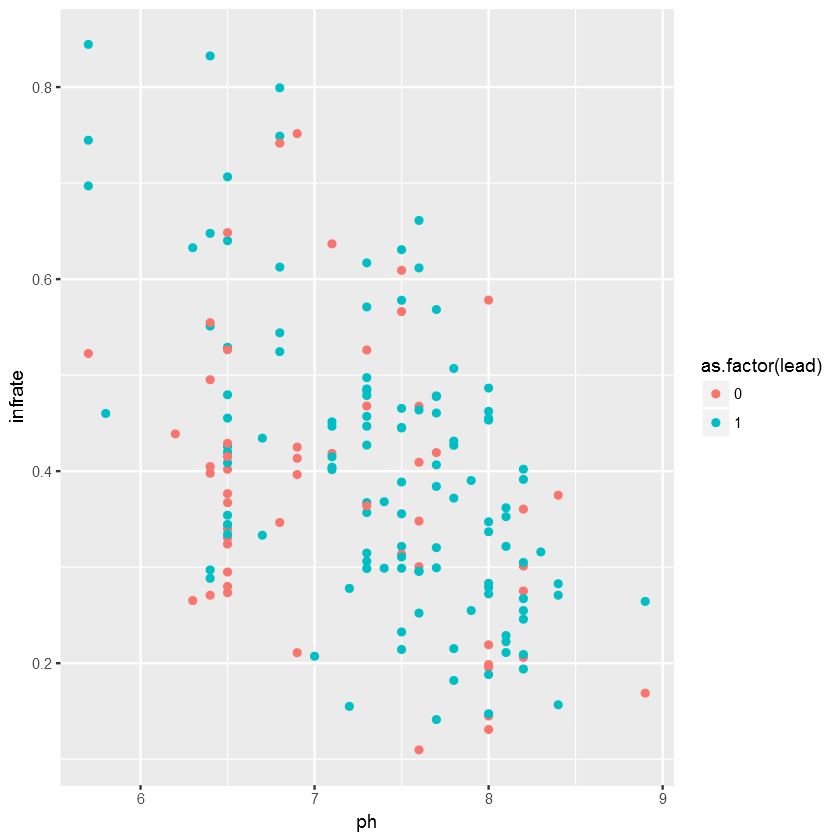

In [87]:
library(ggplot2)
p= ggplot(data = lead, mapping = aes(x=ph  , y=infrate, color = as.factor(lead))) 
p+ geom_point()

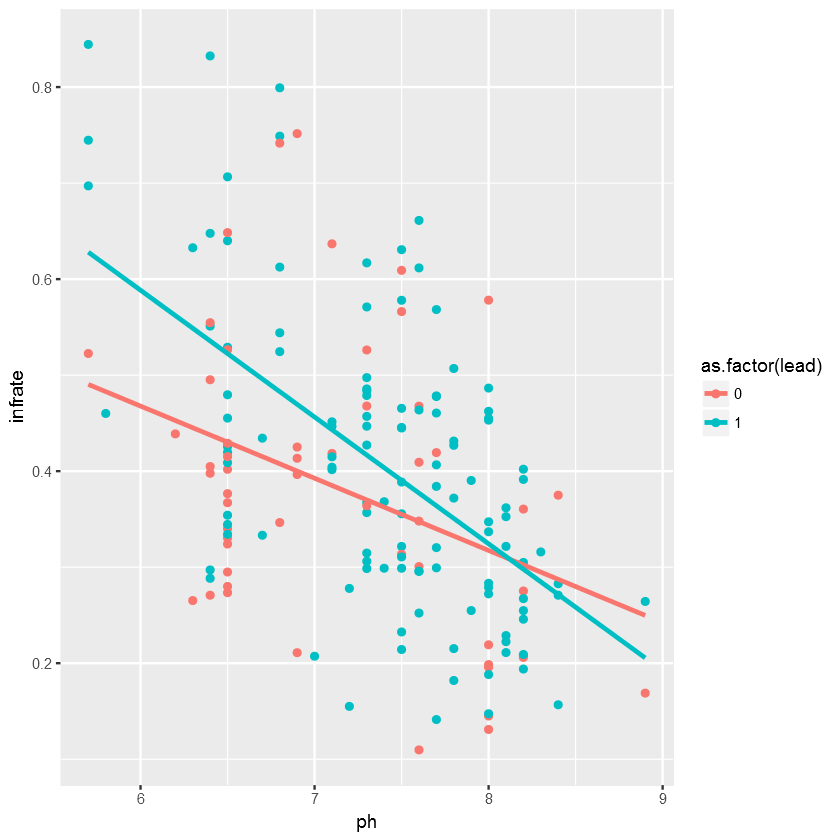

In [88]:
p + geom_point()+ stat_smooth(method = "lm" , fill=NA)

# , se = FALSE

In [82]:
t.test(formula = lead$infrate ~ lead$lead)


	Welch Two Sample t-test

data:  lead$infrate by lead$lead
t = -0.90387, df = 109.29, p-value = 0.3681
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.07052551  0.02634606
sample estimates:
mean in group 0 mean in group 1 
      0.3811679       0.4032576 


In [83]:
t.test(lead$infrate[lead$lead== 0], lead$infrate[lead$lead== 1], "g", 1, FALSE, TRUE, 0.95)


	Two Sample t-test

data:  lead$infrate[lead$lead == 0] and lead$infrate[lead$lead == 1]
t = -41.289, df = 170, p-value = 1
alternative hypothesis: true difference in means is greater than 1
95 percent confidence interval:
 -0.06303082         Inf
sample estimates:
mean of x mean of y 
0.3811679 0.4032576 


In [84]:


mean(lead$infrate[lead$lead== 1])


[1] 0.4032576

In [93]:
#p307 version4
model1 <- lm(infrate~lead+ph+I(lead*ph),data = lead)
summary(model1)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph), data = lead)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27492 -0.09502 -0.00266  0.07965  0.35139 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.91890    0.17447   5.267  4.2e-07 ***
lead          0.46180    0.22122   2.087  0.03835 *  
ph           -0.07518    0.02427  -3.098  0.00229 ** 
I(lead * ph) -0.05686    0.03040  -1.871  0.06312 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1303 on 168 degrees of freedom
Multiple R-squared:  0.2719,	Adjusted R-squared:  0.2589 
F-statistic: 20.91 on 3 and 168 DF,  p-value: 1.467e-11


In [115]:
#http://drewdimmery.com/robust-ses-in-r/
#heteroskedasticity robust standard errors in R. In Stata, this is trivially easy: you simply add “, robust” to the end of your regression command (or , cluster(var) for cluster robust SEs). In R, there’s a bit more flexibility, but this comes at the cost of a little added complication. Simplest first.
require("sandwich")
require("lmtest")
model1$newse<-vcovHC(model1)
coeftest(model1,model1$newse)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)   0.918904   0.155541  5.9078 1.876e-08 ***
lead          0.461798   0.213727  2.1607   0.03214 *  
ph           -0.075179   0.021689 -3.4663   0.00067 ***
I(lead * ph) -0.056862   0.028940 -1.9648   0.05108 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [100]:
#library(AER)
library(car)
linearHypothesis(model1,c( "lead=0", "I(lead * ph)=0"), white.adjust="hc1")

Res.Df,Df,F,Pr(>F)
170,NA,NA,NA
168,2,3.936032,0.02135224


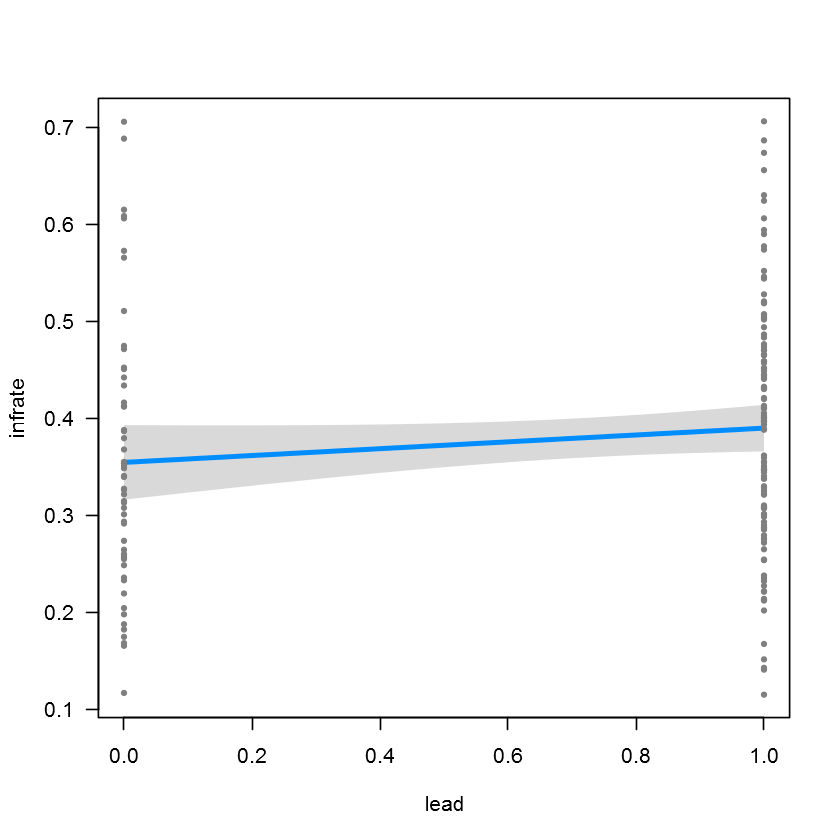

In [101]:
visreg(model1, "lead", type="conditional")

In [105]:
model2 <- lm(infrate~ lead +ph+I(lead*ph)+mom_rate+np_tub_rate+typhoid_rate,data = lead)
summary(model2)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph) + mom_rate + 
    np_tub_rate + typhoid_rate, data = lead)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.257169 -0.082441 -0.008178  0.085858  0.301600 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.76666    0.17964   4.268 3.32e-05 ***
lead          0.52205    0.21119   2.472 0.014454 *  
ph           -0.07123    0.02318  -3.073 0.002479 ** 
I(lead * ph) -0.06545    0.02900  -2.257 0.025334 *  
mom_rate      0.13247    0.29744   0.445 0.656630    
np_tub_rate   2.33233    0.80444   2.899 0.004249 ** 
typhoid_rate  1.25344    0.33841   3.704 0.000289 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1239 on 165 degrees of freedom
Multiple R-squared:  0.3536,	Adjusted R-squared:  0.3301 
F-statistic: 15.04 on 6 and 165 DF,  p-value: 1.069e-13


In [106]:
linearHypothesis(model2,c( "lead=0", "I(lead * ph)=0"), white.adjust="hc1")

Res.Df,Df,F,Pr(>F)
167,NA,NA,NA
165,2,4.724529,0.01011028


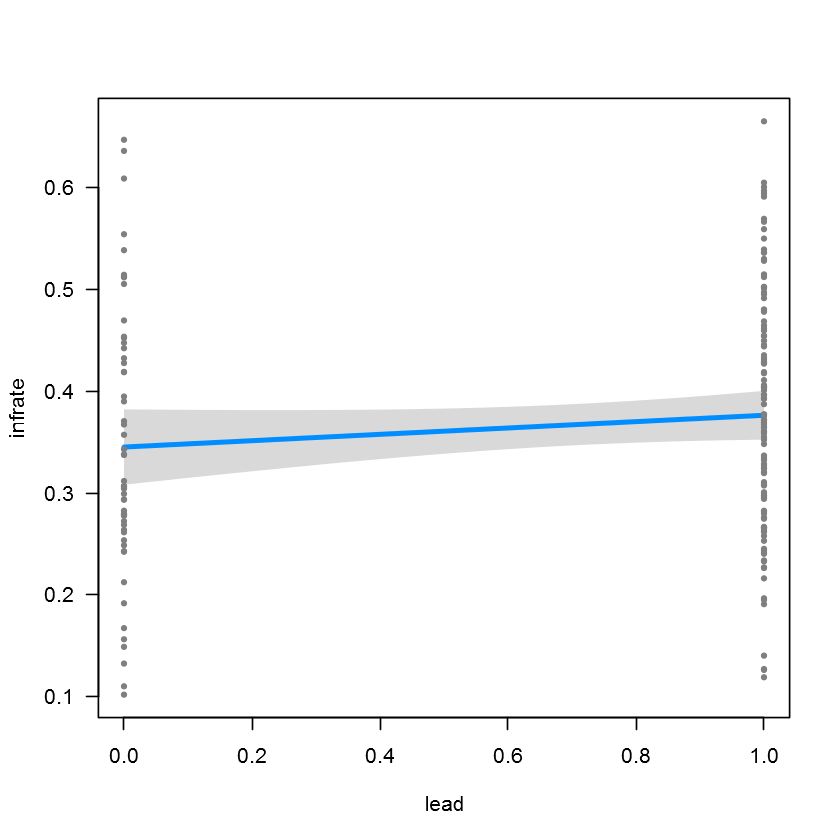

In [107]:
visreg(model2, "lead", type="conditional")

In [112]:
model4 <- lm(infrate~ lead +ph+I(lead*ph)+np_tub_rate+typhoid_rate+hardness+precipitation+temperature,data = lead)
summary(model3)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph) + np_tub_rate + 
    typhoid_rate + hardness + precipitation + temperature, data = lead)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.298122 -0.081011 -0.008036  0.078393  0.312767 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.2124983  0.1989007   1.068 0.286936    
lead           0.4537721  0.2014461   2.253 0.025621 *  
ph            -0.0355440  0.0249430  -1.425 0.156066    
I(lead * ph)  -0.0551874  0.0276446  -1.996 0.047565 *  
np_tub_rate    2.0134319  0.7657999   2.629 0.009378 ** 
typhoid_rate   0.9341702  0.3308150   2.824 0.005337 ** 
hardness      -0.0001632  0.0001099  -1.485 0.139521    
precipitation  0.0727929  0.0197722   3.682 0.000315 ***
temperature    0.0022263  0.0020193   1.102 0.271883    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1164 on 163 degrees of freedom
Multiple R-squared:  0.4357,	Ad

In [113]:
linearHypothesis(model4,c( "lead=0", "I(lead * ph)=0"), white.adjust="hc1")

Res.Df,Df,F,Pr(>F)
165,NA,NA,NA
163,2,4.410415,0.01363362


In [ ]:
model4 <- lm(infrate~ lead +ph+I(lead*ph)+hardness+precipitation+temperature,data = lead)
summary(model3)

In [92]:
model2 <- lm(infrate~ lead+ph+I(lead*ph),data = lead)
summary(model2)


Call:
lm(formula = infrate ~ lead + ph + I(lead * ph), data = lead)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27492 -0.09502 -0.00266  0.07965  0.35139 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.91890    0.17447   5.267  4.2e-07 ***
lead          0.46180    0.22122   2.087  0.03835 *  
ph           -0.07518    0.02427  -3.098  0.00229 ** 
I(lead * ph) -0.05686    0.03040  -1.871  0.06312 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1303 on 168 degrees of freedom
Multiple R-squared:  0.2719,	Adjusted R-squared:  0.2589 
F-statistic: 20.91 on 3 and 168 DF,  p-value: 1.467e-11


In [90]:
mean(lead$ph)

[1] 7.322674

In [91]:
model3 <- lm(infrate~ as.factor(lead)+ph+I(lead*ph)+population+temperature,data = lead)
summary(model3)


Call:
lm(formula = infrate ~ as.factor(lead) + ph + I(lead * ph) + 
    population + temperature, data = lead)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30337 -0.09061 -0.00859  0.07073  0.40042 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.736e-01  1.818e-01   3.705 0.000288 ***
as.factor(lead)1  3.485e-01  2.165e-01   1.609 0.109417    
ph               -8.844e-02  2.376e-02  -3.723 0.000270 ***
I(lead * ph)     -4.221e-02  2.973e-02  -1.420 0.157560    
population        1.821e-06  3.109e-06   0.586 0.558703    
temperature       6.971e-03  1.922e-03   3.626 0.000382 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.126 on 166 degrees of freedom
Multiple R-squared:  0.3266,	Adjusted R-squared:  0.3063 
F-statistic:  16.1 on 5 and 166 DF,  p-value: 6.275e-13
